In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rich.table import Table
from rich import print as rptint
import json
import os
import pandas as pd

scenario_name = "CWE-89-SQL-injection"
TIME_PERIOD = 1
TIME_INTERVAL = '1MS'
save_file_path = os.path.join('K:/hids/LID-DS-master/tools/out', scenario_name)

获取数据

In [2]:
test_normal_df = pd.read_pickle(os.path.join(save_file_path,  'DF_test_normal.pkl'))
test_exploit_df = pd.read_pickle(os.path.join(save_file_path, 'DF_test_exploit.pkl'))

In [3]:
test_normal_df.time = pd.to_datetime(test_normal_df['time'])
test_exploit_df.time = pd.to_datetime(test_exploit_df['time'])

In [4]:
test_normal_df

,time,UserID,PID,ProcessName,TID,syscall,DIR,ARGS
0,2021-09-08 06:44:50.806378308,101,3861861,mysqld,3862354,select,<,res=0
1,2021-09-08 06:44:50.806386943,101,3861861,mysqld,3862354,select,>,NaN
2,2021-09-08 06:44:50.806627721,101,3861861,mysqld,3862355,select,<,res=0
3,2021-09-08 06:44:50.806631058,101,3861861,mysqld,3862355,select,>,NaN
4,2021-09-08 06:44:50.812467214,101,3861861,mysqld,3862357,select,<,res=0
...,...,...,...,...,...,...,...,...
3995634,2021-09-07 22:35:37.639777849,101,3255774,mysqld,3255881,io_getevents,>,NaN
3995635,2021-09-07 22:35:37.653835148,0,3256458,apache2,3256458,select,<,res=0
3995636,2021-09-07 22:35:37.653847621,0,3256458,apache2,3256458,wait4,>,NaN
3995637,2021-09-07 22:35:37.653858358,0,3256458,apache2,3256458,wait4,<,NaN


In [6]:
df  = pd.read_pickle(os.path.join(save_file_path,  'DataFrame', 'abundant_taussig_9121.pkl'))

In [7]:
df_normal = df[df['time'] < 1631083504800282000]
df_exploit = df[df['time'] >= 1631083504800282000]

In [8]:
df_normal.time = pd.to_datetime(df_normal['time'])
df_exploit.time = pd.to_datetime(df_exploit['time'])

C:\Users\SkyGP\.conda\envs\ids\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
df_normal.resample('S',on='time')['PID'].agg('count')

time
2021-09-08 06:44:50      12
2021-09-08 06:44:51    2222
2021-09-08 06:44:52    4756
2021-09-08 06:44:53    5050
2021-09-08 06:44:54    3834
2021-09-08 06:44:55    2554
2021-09-08 06:44:56    4140
2021-09-08 06:44:57    3174
2021-09-08 06:44:58    3993
2021-09-08 06:44:59    1344
2021-09-08 06:45:00    1510
2021-09-08 06:45:01    1447
2021-09-08 06:45:02    1430
2021-09-08 06:45:03    1320
2021-09-08 06:45:04    2443
Freq: S, Name: PID, dtype: int64

In [12]:
df_exploit.resample('S',on='time')['PID'].agg('count')

time
2021-09-08 06:45:04     1319
2021-09-08 06:45:05     2932
2021-09-08 06:45:06    44722
2021-09-08 06:45:07    18041
2021-09-08 06:45:08     1608
2021-09-08 06:45:09     3206
2021-09-08 06:45:10     3832
2021-09-08 06:45:11     1552
2021-09-08 06:45:12     2898
2021-09-08 06:45:13     4135
2021-09-08 06:45:14     2110
2021-09-08 06:45:15     2198
2021-09-08 06:45:16     4048
2021-09-08 06:45:17    26781
2021-09-08 06:45:18     3046
2021-09-08 06:45:19     1230
2021-09-08 06:45:20     1284
2021-09-08 06:45:21     1218
2021-09-08 06:45:22     2186
2021-09-08 06:45:23       12
Freq: S, Name: PID, dtype: int64

In [47]:
pd.to_datetime(1631083505996365168)

Timestamp('2021-09-08 06:45:05.996365168')

画条形图进行比较

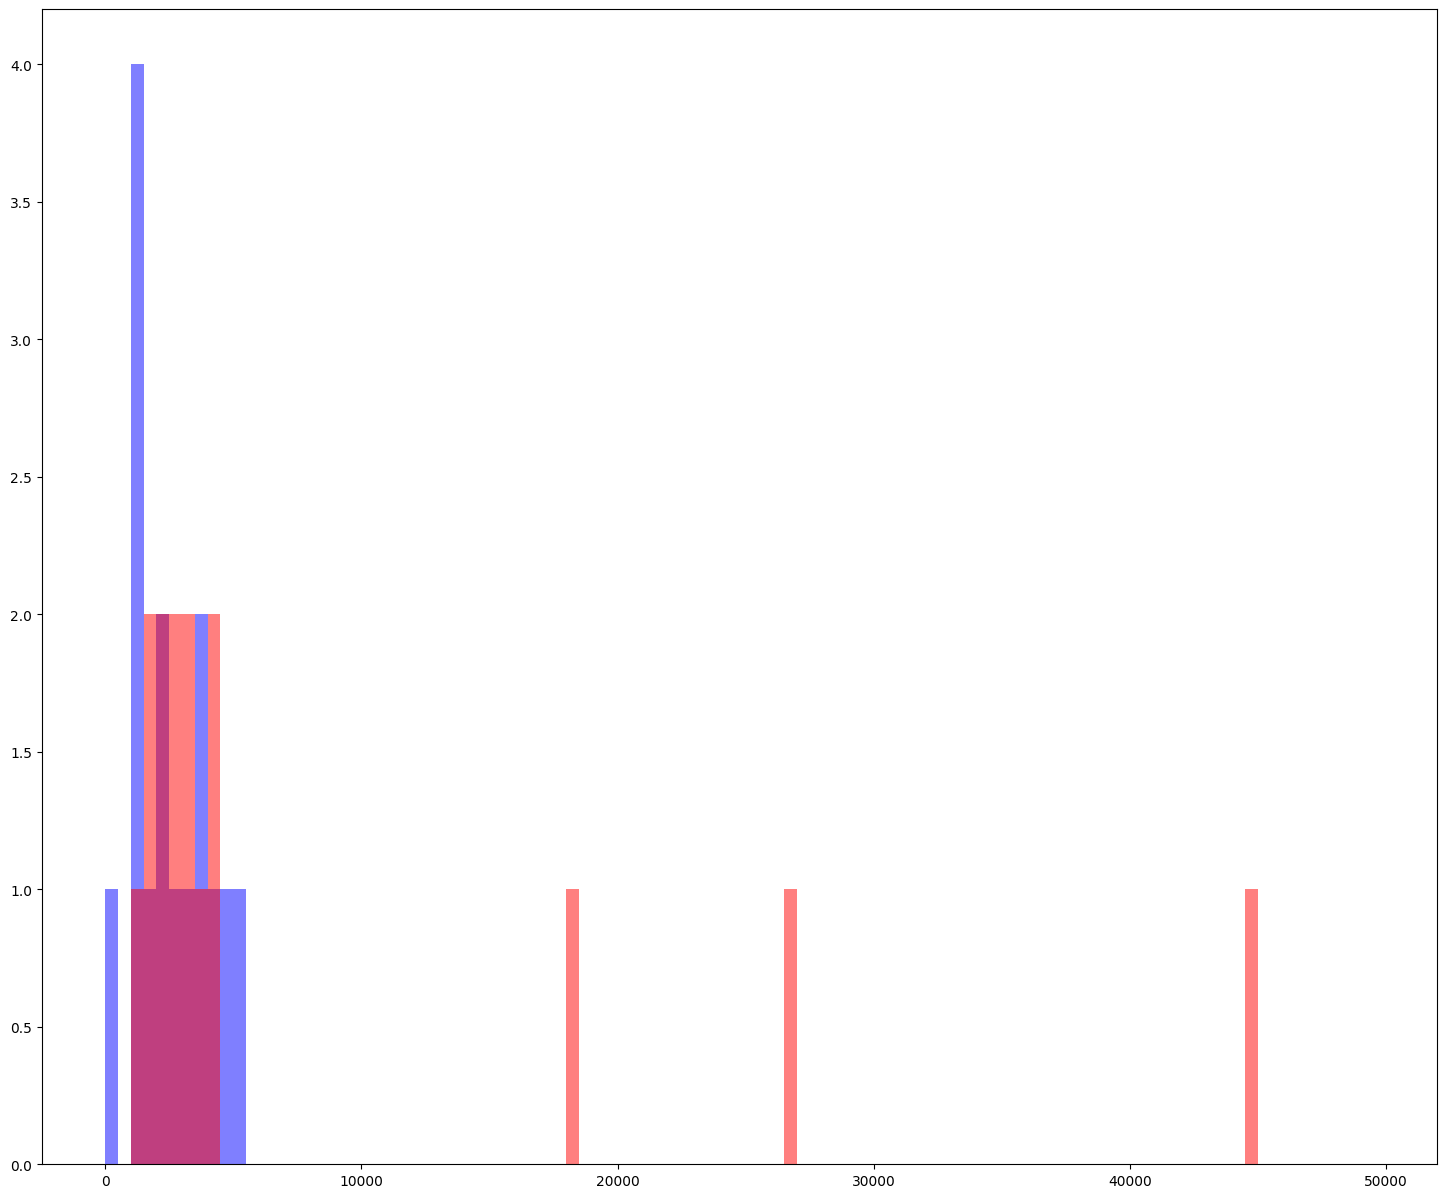

In [18]:
plt.figure(figsize=(18,15))

exploit = df_exploit.resample('S',on='time')['PID'].agg('count').to_list()
normal = df_normal.resample('S',on='time')['PID'].agg('count').to_list()
lenth = min(len(exploit), len(normal))

x_label = [i for i in range(lenth)]
bins = np.arange(0, 50000, 500)
plt.hist(normal[:lenth], bins=bins, alpha = 0.5, color='blue')
plt.hist(exploit[:lenth],  bins=bins, alpha = 0.5,  color='red')

plt.show()

PID 异常每分钟数量比正常，可能有明显特征

### 2. TID

In [19]:
df_normal.resample('S',on='time')['TID'].agg('count')
df_exploit.resample('S',on='time')['TID'].agg('count')

time
2021-09-08 06:45:04     1319
2021-09-08 06:45:05     2932
2021-09-08 06:45:06    44722
2021-09-08 06:45:07    18041
2021-09-08 06:45:08     1608
2021-09-08 06:45:09     3206
2021-09-08 06:45:10     3832
2021-09-08 06:45:11     1552
2021-09-08 06:45:12     2898
2021-09-08 06:45:13     4135
2021-09-08 06:45:14     2110
2021-09-08 06:45:15     2198
2021-09-08 06:45:16     4048
2021-09-08 06:45:17    26781
2021-09-08 06:45:18     3046
2021-09-08 06:45:19     1230
2021-09-08 06:45:20     1284
2021-09-08 06:45:21     1218
2021-09-08 06:45:22     2186
2021-09-08 06:45:23       12
Freq: S, Name: TID, dtype: int64

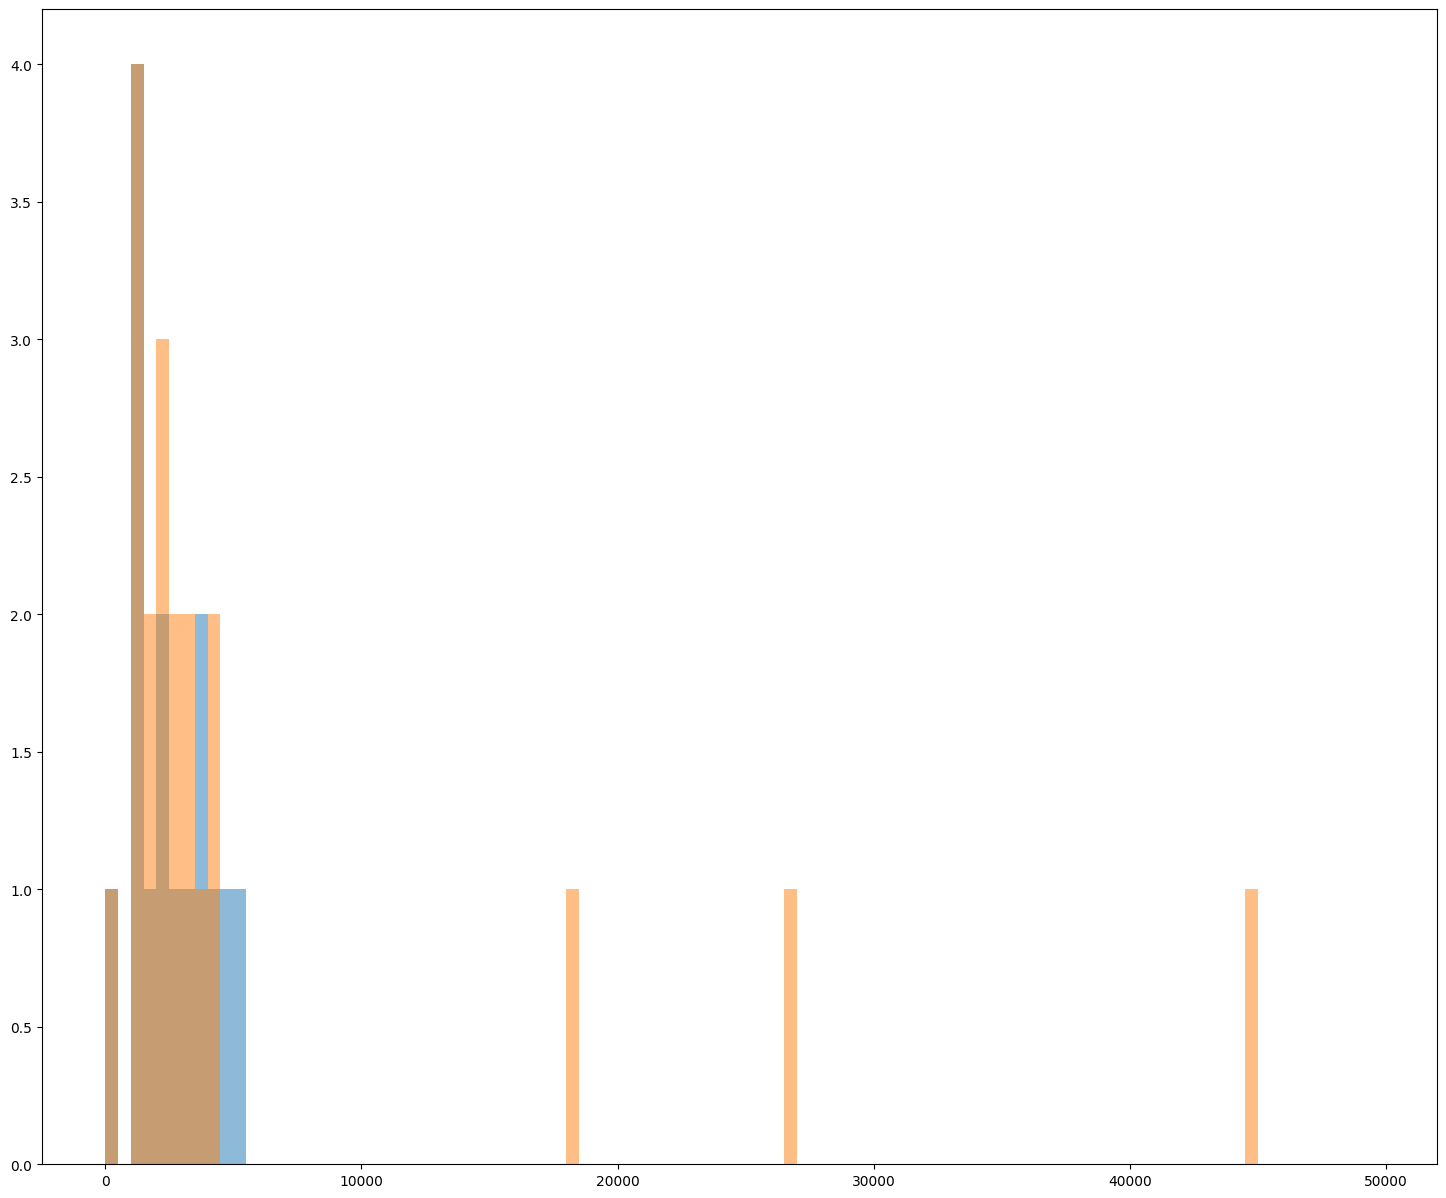

In [20]:
plt.figure(figsize=(18,15))

exploit = df_exploit.resample('S',on='time')['TID'].agg('count').to_list()
normal = df_normal.resample('S',on='time')['TID'].agg('count').to_list()

bins = np.arange(0, 50000, 500)
plt.hist(normal, bins=bins, alpha = 0.5)
plt.hist(exploit,  bins=bins, alpha = 0.5)

plt.show()

PID 异常每分钟数量比正常，可能有明显特征

### 3. PID & TID

一个 pid 里 有 多少个 TID 数量

### 4. 全部

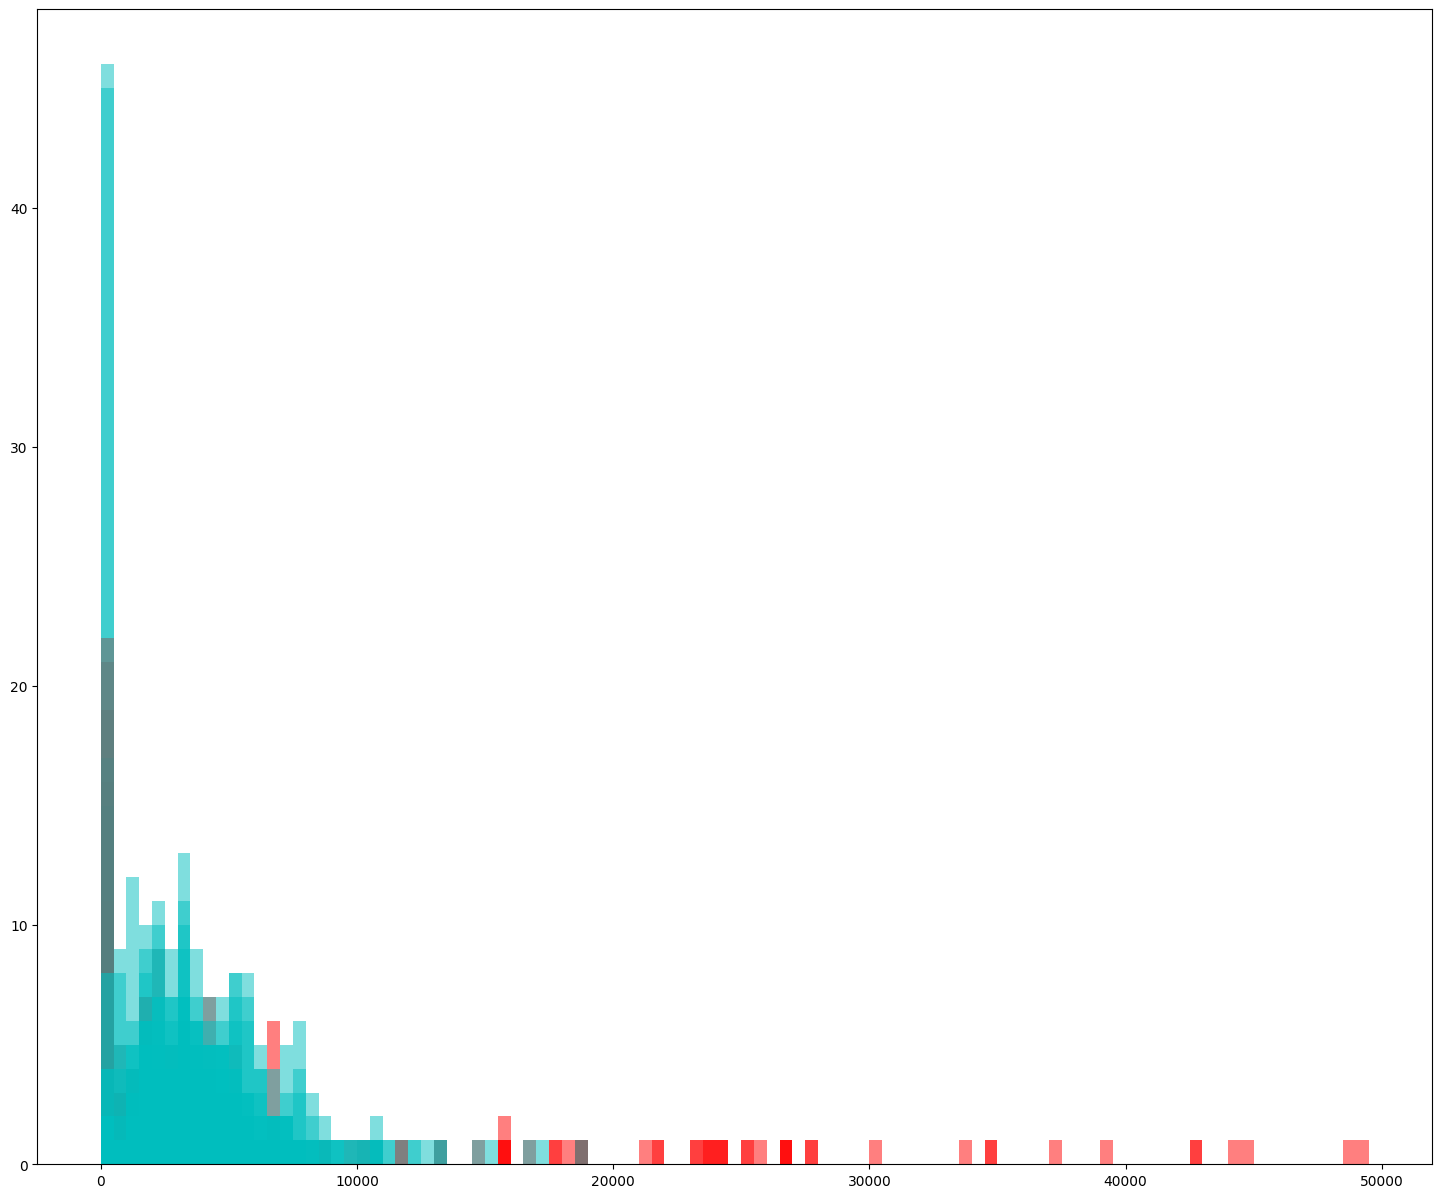

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from rich.table import Table
from rich import print as rptint
import json
import os
import pandas as pd

scenario_name = "CWE-89-SQL-injection"
save_file_path = os.path.join('K:/hids/LID-DS-master/tools/out', scenario_name)

work_dir = os.path.join(save_file_path, 'DataFrame')

with open(os.path.join(save_file_path, scenario_name + '.json'),'r') as f:
    exploit_record = json.load(f)

plt.figure(figsize=(18,15))
bins = np.arange(0, 50000, 500)

for file in os.listdir(work_dir):
    df  = pd.read_pickle(os.path.join(work_dir,  file))
    exploit_start_time = exploit_record.get(file, 0)

    if exploit_start_time == 0:
        df_normal = df
        df_normal.time = pd.to_datetime(df_normal['time'])
        normal = df_normal.resample('S',on='time')['PID'].agg('count').to_list()
        plt.hist(normal, bins=bins, alpha = 0.5, color='c')
    else:
        # print(f'File {file} Exploit, time: {exploit_start_time}')
        x = df.copy()
        df_normal = df[df['time'] < exploit_start_time]
        df_exploit = df[df['time'] >= exploit_start_time]

        x = df_normal.copy()
        x.loc[:, 'time'] = pd.to_datetime(x.loc[:, 'time'])
        df_normal = x

        x = df_exploit.copy()
        x.loc[:, 'time'] = pd.to_datetime(x.loc[:, 'time'])
        df_exploit = x

        exploit = df_exploit.resample('S',on='time')['PID'].agg('count').to_list()
        normal = df_normal.resample('S',on='time')['PID'].agg('count').to_list()

        plt.hist(normal, bins=bins, alpha = 0.5, color='c')
        plt.hist(exploit,  bins=bins, alpha = 0.5, color='r')

plt.show()


全部 PID频率， 异常文件有明显特征

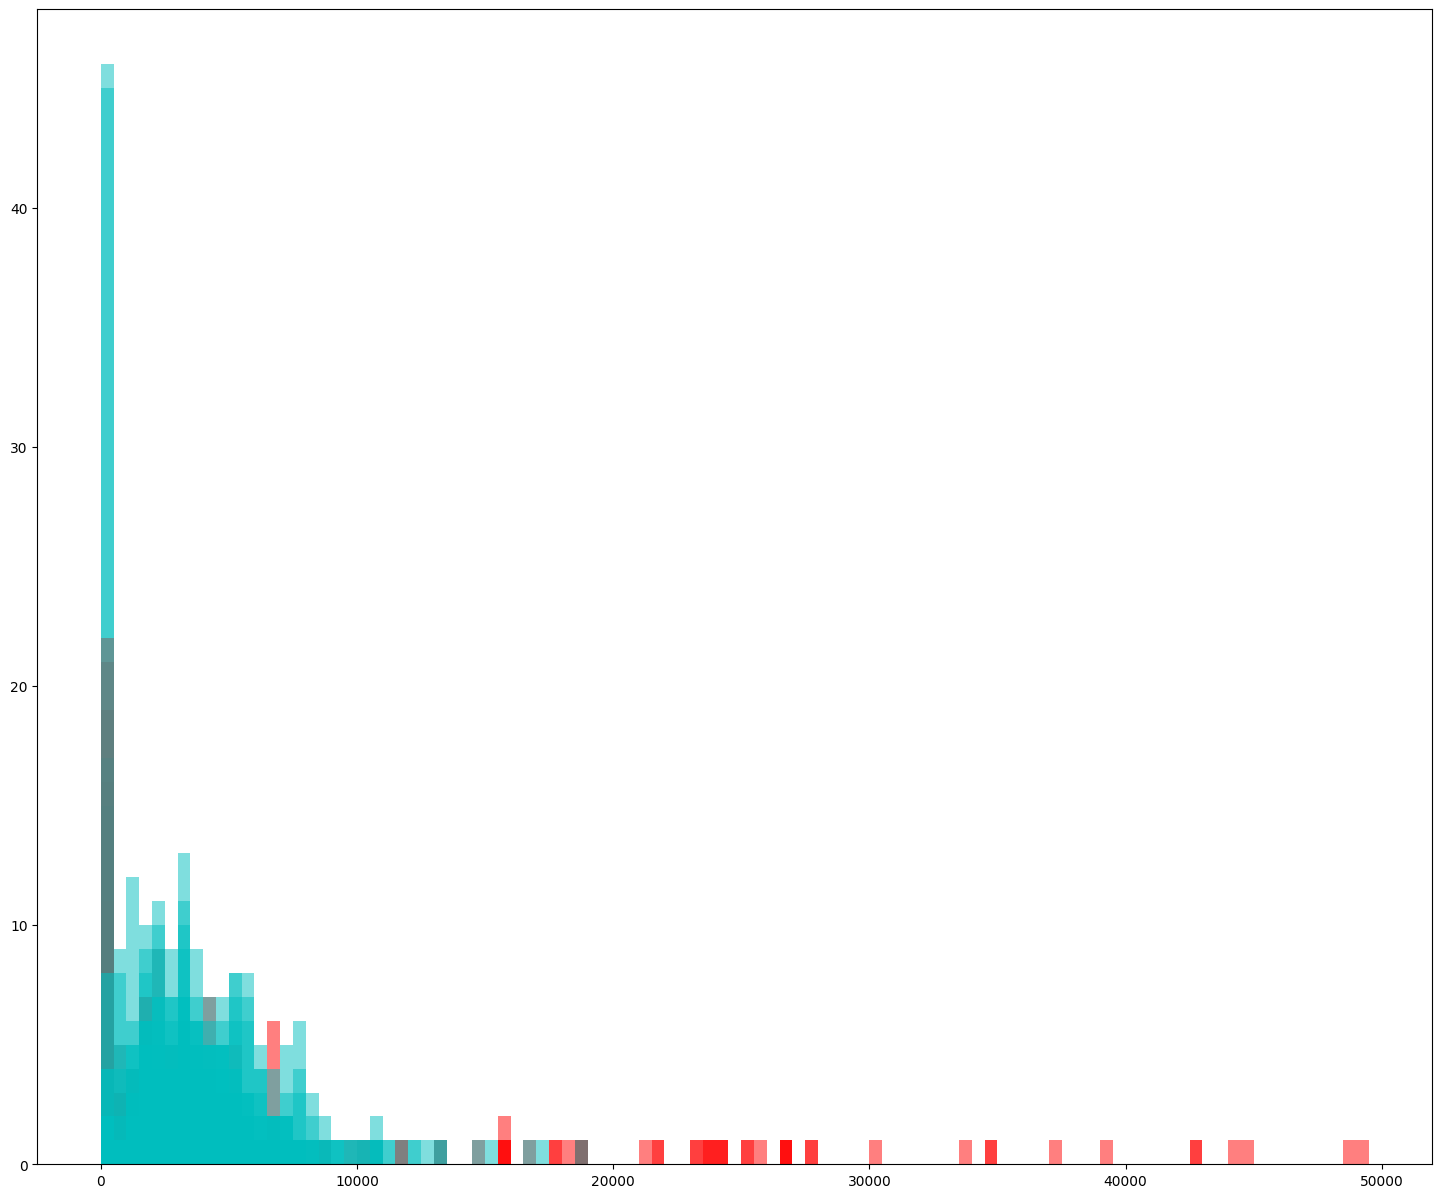

In [3]:
plt.figure(figsize=(18,15))

for file in os.listdir(work_dir):
    df  = pd.read_pickle(os.path.join(work_dir,  file))
    exploit_start_time = exploit_record.get(file, 0)

    if exploit_start_time == 0:
        df_normal = df
        df_normal.time = pd.to_datetime(df_normal['time'])
        normal = df_normal.resample('S',on='time')['TID'].agg('count').to_list()
        plt.hist(normal, bins=bins, alpha = 0.5, color='c')
    else:
        # print(f'File {file} Exploit, time: {exploit_start_time}')
        x = df.copy()
        df_normal = df[df['time'] < exploit_start_time]
        df_exploit = df[df['time'] >= exploit_start_time]

        x = df_normal.copy()
        x.loc[:, 'time'] = pd.to_datetime(x.loc[:, 'time'])
        df_normal = x

        x = df_exploit.copy()
        x.loc[:, 'time'] = pd.to_datetime(x.loc[:, 'time'])
        df_exploit = x

        exploit = df_exploit.resample('S',on='time')['TID'].agg('count').to_list()
        normal = df_normal.resample('S',on='time')['TID'].agg('count').to_list()

        plt.hist(normal, bins=bins, alpha = 0.5, color='c')
        plt.hist(exploit,  bins=bins, alpha = 0.5,  color='r')

plt.show()